In [1]:
# 8. Семейное положение и доход
# Гипотеза: существует связь между семейным положением и уровнем дохода.
# Дополнительный анализ:
# 	- Проверить другие переменные: живёт ли респондент с партнёром (вне брака), наличие детей и количество детей.


In [2]:
from dataframes import dataframes # словарь датафреймов, ключи: 2010, 2012, 2014, 2016, 2018, 2021, 2022.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
dataframes_list = [dataframes['2010'], dataframes['2012'], dataframes['2014'], dataframes['2016'], dataframes['2018'], dataframes['2021'], dataframes['2022']]

Используемы в исследовании переменные:
- realrinc - реальный доход
- marital - семейное положение
- childs - наличие и количество детей

Значения marital, которые значат, что респондент:
- 1 - женат
- 2 - вдовец
- 3 - разведён
- 4 - женат, но живёт с партнёром раздельно
- 5 - никогда не был женат

Значения childs, которые значат, что респондент:
- 0 - нет детей
- 1-7 - количество детей

# Создаём датафрейм

In [4]:
cols = ['realrinc','marital','childs']
df = pd.concat(
    [frame[frame.columns.intersection(cols)].copy() for frame in dataframes_list],
    ignore_index=True
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19952 entries, 0 to 19951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marital   19919 non-null  float64
 1   childs    19864 non-null  float64
 2   realrinc  11667 non-null  float64
dtypes: float64(3)
memory usage: 467.8 KB


In [5]:
df['realrinc'] = df['realrinc'].apply(lambda x: x if x < 100_000 else 100_000)

In [6]:
df.head()

,marital,childs,realrinc
0,5.0,0.0,42735.0
1,5.0,0.0,3885.0
2,3.0,3.0,100000.0
3,2.0,5.0,100000.0
4,1.0,8.0,100000.0


# Сразу удаляем лишние данные

In [7]:
df = df[df.realrinc.notna() & df.marital.notna() & df.childs.notna()]
df.shape

(19838, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19838 entries, 0 to 19951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marital   19838 non-null  float64
 1   childs    19838 non-null  float64
 2   realrinc  19838 non-null  float64
dtypes: float64(3)
memory usage: 619.9 KB


# Проверяем данные

Гистограмма для дохода:

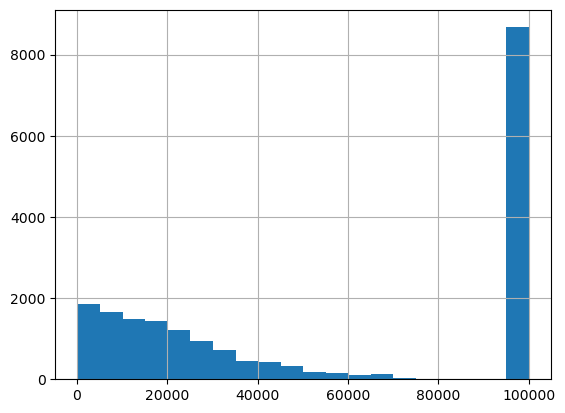

In [9]:
df.realrinc.hist(bins=20);

Количество людей в группах для marital и гистограмма:

In [10]:
df.groupby('marital').count()

,childs,realrinc
marital,,
1.0,8862,8862
2.0,1574,1574
3.0,3280,3280
4.0,606,606
5.0,5516,5516


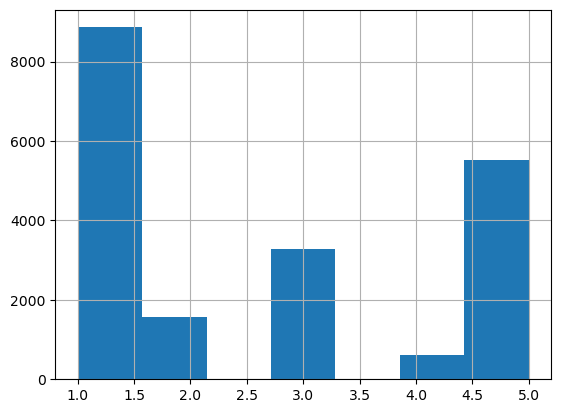

In [11]:
df.marital.hist(bins=7);

Количество людей в группах для childs и гистограмма:

In [12]:
df.groupby('childs').count()

,marital,realrinc
childs,,
0.0,5725,5725
1.0,3123,3123
2.0,5300,5300
3.0,3054,3054
4.0,1452,1452
5.0,561,561
6.0,309,309
7.0,138,138
8.0,176,176


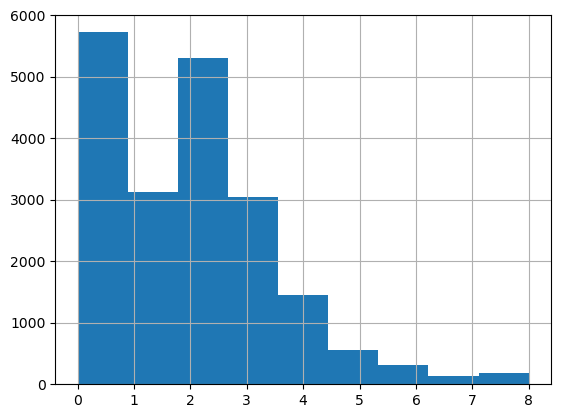

In [13]:
df.childs.hist(bins=9);

# Проводим анализ

## Анализ дохода от семейного положения

Зависимость уровня дохода от семейного положения:

In [14]:
vals = df.groupby('marital').realrinc.mean().reset_index()
vals

,marital,realrinc
0,1.0,56053.145199
1,2.0,80600.509530
2,3.0,54546.574695
3,4.0,52219.196782
4,5.0,46931.859046


Проверяем количество данных для каждого значения

In [15]:
check = df.groupby('marital').realrinc.count()
check

marital
1.0    8862
2.0    1574
3.0    3280
4.0     606
5.0    5516
Name: realrinc, dtype: int64

Переименовываем значения

In [16]:
vals.loc[0, 'marital'] = 'Женат'
vals.loc[1, 'marital'] = 'Вдовец'
vals.loc[2, 'marital'] = 'Разведён'
vals.loc[3, 'marital'] = 'Женат, но живёт\n с партнёром раздельно'
vals.loc[4, 'marital'] = 'Не был женат'

C:\Users\Hroft\AppData\Local\Temp\ipykernel_21560\2632081682.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Женат' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  vals.loc[0, 'marital'] = 'Женат'


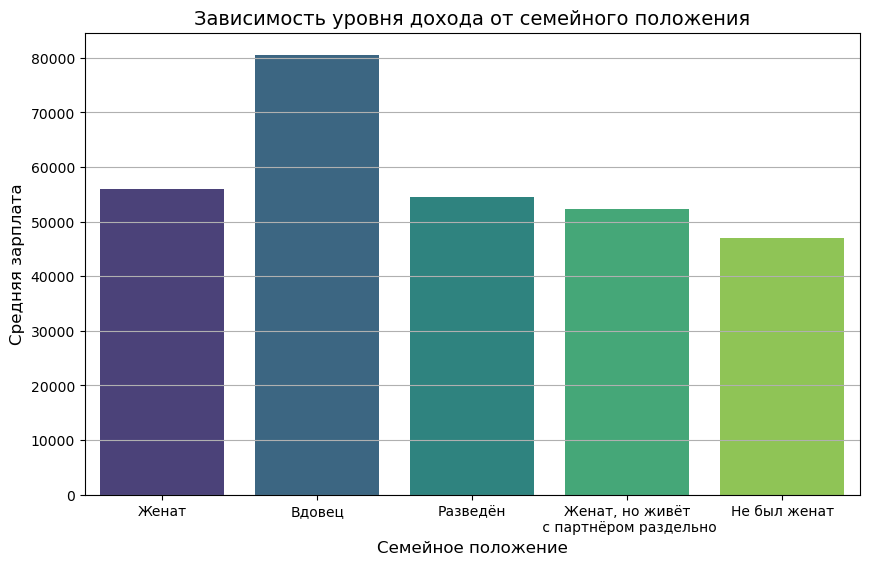

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='realrinc', data=vals, hue='marital', palette='viridis')

plt.title('Зависимость уровня дохода от семейного положения', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

Описательная статистика для датафрейма

In [18]:
df.describe()

,marital,childs,realrinc
count,19838.000000,19838.000000,19838.000000
mean,2.613872,1.800887,55098.392353
std,1.691160,1.648032,41292.180165
min,1.000000,0.000000,204.500000
25%,1.000000,0.000000,14755.000000
50%,2.000000,2.000000,40900.000000
75%,5.000000,3.000000,100000.000000
max,5.000000,8.000000,100000.000000


## Анализ дохода от количества детей

Зависимость уровня дохода от количества детей:

In [19]:
vals = df.groupby('childs').realrinc.mean().reset_index()
vals

,childs,realrinc
0,0.0,48959.641528
1,1.0,51421.786583
2,2.0,57366.393396
3,3.0,58516.794450
4,4.0,61656.228478
5,5.0,66146.957665
6,6.0,64532.194175
7,7.0,75647.311594
8,8.0,70411.823864


Проверяем количество данных для каждого значения

In [20]:
check = df.groupby('childs').realrinc.count()
check

childs
0.0    5725
1.0    3123
2.0    5300
3.0    3054
4.0    1452
5.0     561
6.0     309
7.0     138
8.0     176
Name: realrinc, dtype: int64

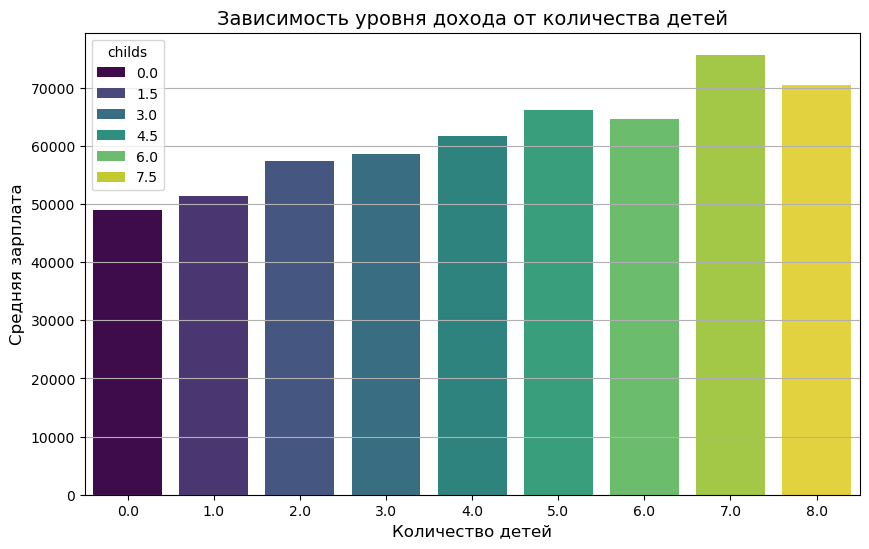

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='childs', y='realrinc', data=vals, hue='childs', palette='viridis')

plt.title('Зависимость уровня дохода от количества детей', fontsize=14)
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

Проверим наличие связи между переменными. Для этого выведем тепловую карту.

<Axes: >

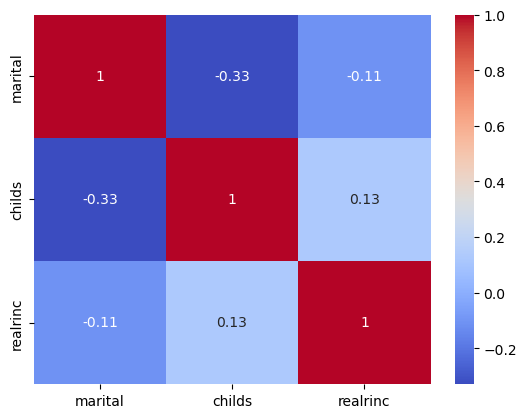

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Полученные результаты позволяют говорить о несущественной связи между семейным положением и детьми, семейным положением и доходами, доходами и детьми.

Создадим две новых бинарных колонки: есть/нет дети; замужем/холост.

In [23]:
df['have_child'] = (df.childs != 0).astype(int)
df['single'] = ((df.marital != 0) & (df.marital != 3)).astype(int)
df

,marital,childs,realrinc,have_child,single
0,5.0,0.0,42735.0,0,1
1,5.0,0.0,3885.0,0,1
2,3.0,3.0,100000.0,1,0
3,2.0,5.0,100000.0,1,1
4,1.0,8.0,100000.0,1,1
...,...,...,...,...,...
19947,1.0,6.0,100000.0,1,1
19948,1.0,0.0,11247.5,0,1
19949,1.0,1.0,15337.5,1,1
19950,5.0,0.0,100000.0,0,1


Выведем новую тепловую карту для определения связей между новыми переменными.

<Axes: >

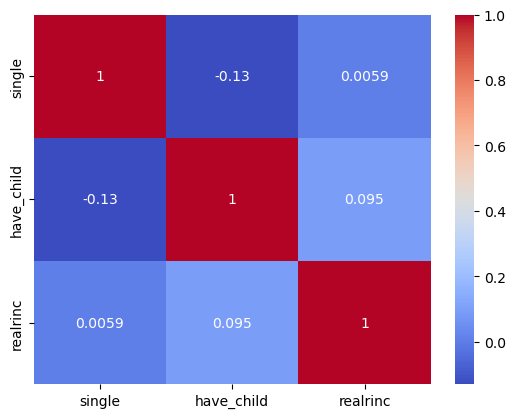

In [24]:
sns.heatmap(df[['single', 'have_child', 'realrinc']].corr(), annot=True, cmap='coolwarm')

Выведем информацию о датафрейме, чтобы проанализировать новосозданные группы.

In [25]:
df.groupby('have_child')['have_child'].value_counts()

have_child
0     5725
1    14113
Name: count, dtype: int64

In [26]:
df.groupby('single')['single'].value_counts()

single
0     3280
1    16558
Name: count, dtype: int64

In [27]:
df.describe()

,marital,childs,realrinc,have_child,single
count,19838.000000,19838.000000,19838.000000,19838.000000,19838.000000
mean,2.613872,1.800887,55098.392353,0.711412,0.834661
std,1.691160,1.648032,41292.180165,0.453117,0.371496
min,1.000000,0.000000,204.500000,0.000000,0.000000
25%,1.000000,0.000000,14755.000000,0.000000,1.000000
50%,2.000000,2.000000,40900.000000,1.000000,1.000000
75%,5.000000,3.000000,100000.000000,1.000000,1.000000
max,5.000000,8.000000,100000.000000,1.000000,1.000000


Из приведенных данных делаем вывод, что у 71% респондентов есть дети, а 83 не связаны узами брака. Выполним тест Краскела-Уоллиса, поскольку распределение данных отлично от нормального, с целью выяснить, значимы ли различия в группах 'single' и 'have_child', или их можно не учитывать при дальнейшем анализе.

In [28]:
from scipy.stats import kruskal

groups = [df[df['single'] == prof]['realrinc'] for prof in df['single'].unique()]

h_stat, p_value = kruskal(*groups)
print('single group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

single group
Крускал-Уоллис p-value: 0.9068


p-value для семейного положения больше 0.05, а значит, смысла рассматривать данную переменную нет, она не имеет статистической значимости. Рассмотрим теперь наличие в семье ребенка.

In [29]:
groups = [df[df['have_child'] == prof]['realrinc'] for prof in df['have_child'].unique()]

h_stat, p_value = kruskal(*groups)
print('have_child group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

have_child group
Крускал-Уоллис p-value: 0.0000


В данном случае значение p-value равно нулю, а значит, между респондентами, у которых дети есть, и у которых их нет, существуют различия. Переменная статистически значима, при построении дальнейшей модели имеет смысл ее использовать.

Проверим наличие разницы между женатыми, живущими вместе и раздельно.

In [30]:
groups = [df[df.marital == 1]['realrinc'], df[df.marital == 4]['realrinc']]
h_stat, p_value = kruskal(*groups)
print('together\separately group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

together\separately group
Крускал-Уоллис p-value: 0.0002


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Hroft\AppData\Local\Temp\ipykernel_21560\423954650.py:3: SyntaxWarning: invalid escape sequence '\s'
  print('together\separately group')


Разница между группами есть, статистически значимая.

Проверим на наличие статистически значимых различий между всеми видами семейного положения.

In [31]:
groups = [df[df['marital'] == prof]['realrinc'] for prof in df['marital'].unique()]

h_stat, p_value = kruskal(*groups)
print('marital group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

marital group
Крускал-Уоллис p-value: 0.0000


p-value равно нулю, а значит, разница между всеми видами присутствует.

# Для построения моделей делаем one-hot кодирование и нормализацию

One-hot кодирование для семейного положения

In [32]:
df = pd.get_dummies(df, columns=['marital'], dtype=int)
#df = pd.get_dummies(df, columns=['childs'])

Нормализация дохода

In [33]:
df.head()

,childs,realrinc,have_child,single,marital_1.0,marital_2.0,marital_3.0,marital_4.0,marital_5.0
0,0.0,42735.0,0,1,0,0,0,0,1
1,0.0,3885.0,0,1,0,0,0,0,1
2,3.0,100000.0,1,0,0,0,1,0,0
3,5.0,100000.0,1,1,0,1,0,0,0
4,8.0,100000.0,1,1,1,0,0,0,0


Построим 4 модели: 
1. доход ~ семейное положение
2. доход ~ наличие детей в семье
3. доход ~ семейное положение + наличие детей в семье
4. доход ~ семейное положение + количество детей в семье

In [34]:
import statsmodels.api as sm

X = df.drop(['realrinc', 'childs', 'have_child', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model1 = sm.OLS(y, X).fit()

# Выводим результаты
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          6.46e-181
Time:                        23:42:23   Log-Likelihood:            -2.3857e+05
No. Observations:               19838   AIC:                         4.772e+05
Df Residuals:                   19833   BIC:                         4.772e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.839e+04    361.891    133.719      

В результате мы получаем никакую модель: низкий R-squared и ни одной значимой переменной. Данных недостаточно для обучения конечной модели и предсказания доходов на основе данных о семейном положении респондента.

In [35]:
X = df['have_child']
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model2 = sm.OLS(y, X).fit()

# Выводим результаты
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           9.56e-41
Time:                        23:42:23   Log-Likelihood:            -2.3891e+05
No. Observations:               19838   AIC:                         4.778e+05
Df Residuals:                   19836   BIC:                         4.778e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.896e+04    543.294     90.116      0.0

Модель, предсказывающая доход на основании наличия в семье ребенка, лучше предыдущей, поскольку коэффициенты у нее значимые. Но низкий R-squared не позволяет использовать данную модель для решения задач.

In [36]:
X = df.drop(['realrinc', 'childs', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model3 = sm.OLS(y, X).fit()

# Выводим результаты
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          1.97e-184
Time:                        23:42:23   Log-Likelihood:            -2.3856e+05
No. Observations:               19838   AIC:                         4.771e+05
Df Residuals:                   19832   BIC:                         4.772e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.62e+04    593.274     77.868      

Третья модель - это сочетание первых двух. Ни одной статистически значимой переменной и крайне низкий R-squared делает данную модель непригодной для использования.

Сравним две модели, простую и расширенную.

In [37]:
from statsmodels.stats.anova import anova_lm
anova_lm(model1, model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,19833.0,3.241732e+13,0.0,NaN,NaN,NaN
1,19832.0,3.238176e+13,1.0,3.556002e+10,21.778505,0.000003


Как видим p-value достаточно высокий, что говорит о том, что расширенная модель хуже урощённой.

In [38]:
X = df.drop(['realrinc', 'have_child', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model4 = sm.OLS(y, X).fit()

# Выводим результаты
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          1.95e-202
Time:                        23:42:23   Log-Likelihood:            -2.3852e+05
No. Observations:               19838   AIC:                         4.771e+05
Df Residuals:                   19832   BIC:                         4.771e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.506e+04    485.881     92.729      

Последняя модель, которая ориентируется на число детей в семье и семейное положение респондента, не сильно выделяется на фоне остальных. Единственный статистически значимый коэффициент - число детей. Но константа остается незначимой, от чего полезность модель не приобретает. Каждая из 4 моделей имеет крайне низкий p-value для F-статистики, что говорит о значимости моделей как таковых, но сильная ограниченность не позволяет их должным образом использовать.

Также сравним две модели, вторую и четвёртую как простую и расширенную.

In [39]:
anova_lm(model2, model4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,19836.0,3.351970e+13,0.0,NaN,NaN,NaN
1,19832.0,3.224623e+13,4.0,1.273470e+12,195.801688,6.002693e-165


Здесь p-value очень низкий, что говорит о том, что расширенная модель лучше упрощённой.

Для наглядности, попробуем визуализировать одну из моделей, чтобы подтвердить наши выводы об их непригодности.

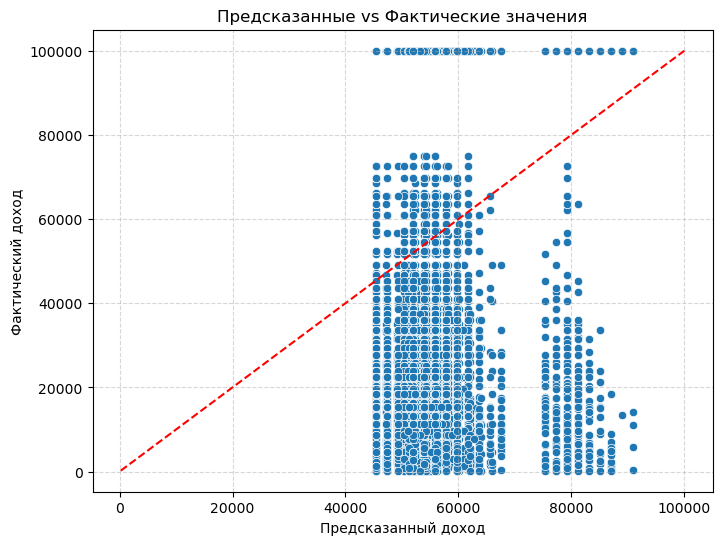

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model4.fittedvalues, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального предсказания
plt.title('Предсказанные vs Фактические значения')
plt.xlabel('Предсказанный доход')
plt.ylabel('Фактический доход')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Выводы

1. В ходе выполнения данного исследования выяснилось, что в среднем у людей в браке больший доход, чем у людей вне брака, что подверждает нашу гипотезу.
2. Связи между числом детей в семье и доходом не выявлено.
3. Наличие же ребенка свидетельствует о чуть больших доходах семьи, если сравнивать с такой же семьей без детей.
4. Модели регрессии, ограниченные данными о наличии/количестве детей в семье и о семейном положении, непригодны для выполнения анализа, пусть они и статистически значимы. Их необходимо расширять.

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='realrinc', data=vals, hue='marital', palette='viridis')

plt.title('Зависимость уровня дохода от семейного положения', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

ValueError: Could not interpret value `marital` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
groups = [df[df['have_child'] == prof]['realrinc'] for prof in df['have_child'].unique()]

h_stat, p_value = kruskal(*groups)
print('have_child group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model4.fittedvalues, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального предсказания
plt.title('Предсказанные vs Фактические значения')
plt.xlabel('Предсказанный доход')
plt.ylabel('Фактический доход')
plt.grid(linestyle='--', alpha=0.5)
plt.show()